# Time Series Analysis

Time series analysis is a statistical technique used to analyze and interpret data points collected over time. It involves studying the patterns, trends, and other characteristics of time-series data to make informed predictions or draw meaningful insights.

In time series analysis, the data points are typically collected afixedar intervals (e.g., dail weekly,y, monthly, quarterly) and are arranged in chronological order. Common examples of time series data include stock prices, weather patterns, economic indicators, and sales figur. s.

In the field of business analytics, time series analysis is used in various applications such as sales forecasting, inventory management, financial analysis, and demand forecasting. Understanding time series analysis allowyouts to:1. 

Forecast Future Trends: Time series analysis helps in predicting future trends based on historical data, which is valuable for making strategic business decision2. s.

Identify Patterns and Anomalies: It helps in identifying patterns, trends, and anomalies in data, which can provide valuable insights into business operati3. ons.

Optimize Resource Allocation: By analyzing time series data, businesses can optimize resource allocation, improve efficiency, and reduce 4. costs.

Improve Decision Making: Time series analysis provides data-driven insights that can improve decision-making processes in areas such as marketing, operations, and 5. finance.

Risk Management: It helps in identifying and mitigating risks by analyzing historical data and predicting potential future risks.

Overall, knowledge of time series analysis is highly beneficial for business analytics students as it equips them with the skills needed to analyze and interpret time-based data, which is critical for success in the field of busin

Interesting factor, text data is not typically considered time series data. Time series data consists of observations or measurements taken at successive points in time, whereas text data consists of unstructured textual information that does not inherently have a time component. However, text data can be analyzed in conjunction with time series data in certain contexts. For example, if text data is associated with timestamps indicating when the text was generated (e.g., social media posts, news articles), it can be treated as time-stamped data and analyzed using time series analysis techniques.ess analytics.lysis for forecasting future values based on past observations. They are especially useful for capturing and predicting trends and patterns in the data.

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings("ignore")

sns.set()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

### Random Walk

In the context of time series analysis, a random walk refers to a **stochastic process** where the next value in a sequence is determined by adding a random shock or error term to the previous value. When using a random walk model, the key assumption is that the variable being modeled is **not predictable** and follows a random process. 

The random walk can be formulated as:
$$ X_{t} = X_{t-1} + \epsilon_{t} $$ 

Where,

$X_{t-1}$ is the value of previous time stemp at $t-1$, <br>
$X_{t}$ is the estimated value of at $t$, <br>
$\epsilon_{t}$ is the random or error term at time $t$.

[*********************100%%**********************]  1 of 1 completed


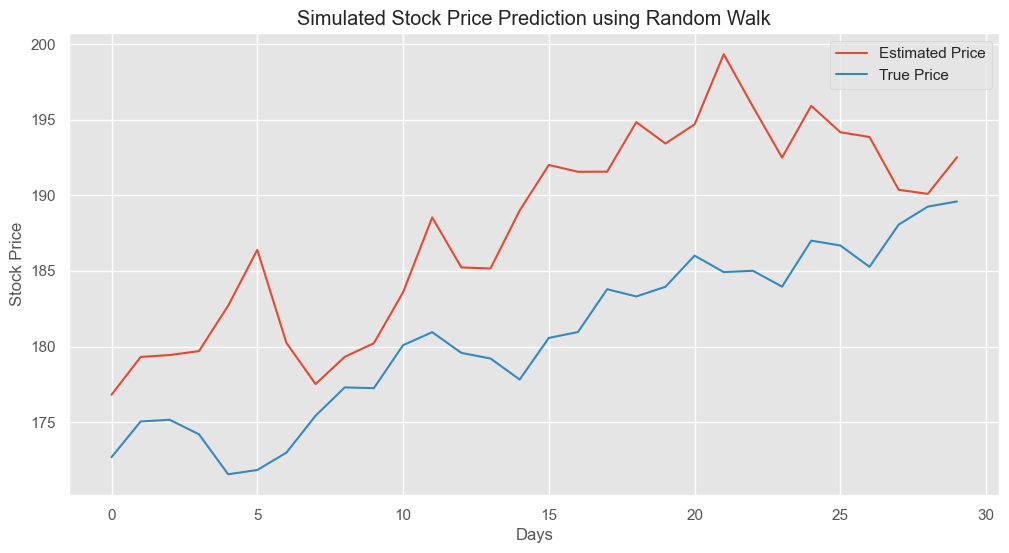

In [2]:
# Download Apple stock data from 01/01/2023 to 02/28/2023
apple_stock = yf.download('AAPL', start='2023-01-01', end='2023-06-30')

# Number of days to simulate
num_days = 30

# Split the data for bulding the model and evaluation
apple_hist = apple_stock.iloc[0: -num_days]
apple_true = apple_stock.iloc[-num_days: ]

# Calculate daily returns
apple_hist['Daily_Returns'] = apple_hist['Close'].pct_change()

# Remove NaN values
apple_hist.dropna(inplace=True)

# Set random seed for reproducibility
np.random.seed(2024)

# Mean daily return (drift) and standard deviation of daily return (volatility)
mu = apple_hist['Daily_Returns'].mean()
sigma = apple_hist['Daily_Returns'].std()

# Get the last stock price as the starting point for simulation
start_price = apple_hist['Close'].iloc[-1]

# Generate daily returns for simulation
daily_returns = np.random.normal(mu, sigma, num_days)

# Calculate the simulated stock price
Estimated_stock_price = start_price * np.exp(np.cumsum(daily_returns))

# Plot the simulated stock price
plt.figure(figsize=(12, 6))
plt.plot(Estimated_stock_price, label = 'Estimated Price')
plt.plot(apple_true['Close'].to_numpy(), label = 'True Price')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Price Prediction using Random Walk')
plt.legend()
plt.show()

In a simple random walk model, we assume that the error terms, $\epsilon_{t}$ are independent and identically distributed (i.i.d.) with mean 0 and constant variance $\sigma^2$. This means that the future value of the time series $X_{t}$ is equal to the current value $X_{t-1}$ plus a random shock $\epsilon_{t}$. 

Mathematically, we can express the expected value of the future value $X_{t}$ given the current value $X_{t-1}$ as:

$$ E[X_{t}| X_{t-1}] = X_{t- 1} $$

This means that, on average, the future value of the time series is equal to the current value, indicating that there is no systematic drift or trend in the time series. Each step in the random walk is random and independent of previous steps, leading to unpredictable future values and the characteristic "random" behavior of the time series.tion

### Autocorrelation Plots
Autocorrelation plots, also known as ACF (autocorrelation function) plots, are used to visualize the autocorrelation of a time series. Autocorrelation measures the relationship between a time series and a lagged version of itself. This can help in identifying patterns such as seasonality and trends in the data. A high autocorrelation at a specific lag indicates a strong relationship between the time series and its lagged version at that lag.

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.An autocorrelation plot shows the value of the autocorrelation function (acf) on the vertical axis. It can range from –1 to 1. 
We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelatio 

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

(array([ 1.        ,  0.84646108,  0.72716185,  0.67886702,  0.58637276,
         0.51062928,  0.47096527,  0.34972707,  0.18122444,  0.05518097,
        -0.03323884, -0.15468672, -0.23853705, -0.2905901 , -0.36599415,
        -0.40349179, -0.39651978, -0.40995202, -0.42065065, -0.38765925,
        -0.36361247, -0.33762577, -0.27696371, -0.21845233, -0.18528178,
        -0.14705667, -0.11524639, -0.06857163, -0.05144097, -0.04101769]),
 array([176.81600702, 179.31248377, 179.44098489, 179.69844112,
        182.69766144, 186.3909982 , 180.24086141, 177.52064157,
        179.32092049, 180.22305345, 183.58838131, 188.53448227,
        185.22831051, 185.16076927, 188.99403464, 192.00078662,
        191.5525353 , 191.55947689, 194.83291426, 193.41843969,
        194.68418129, 199.3201495 , 195.85683764, 192.4899639 ,
        195.91020067, 194.16595488, 193.85231033, 190.36096154,
        190.09280841, 192.51078283]))

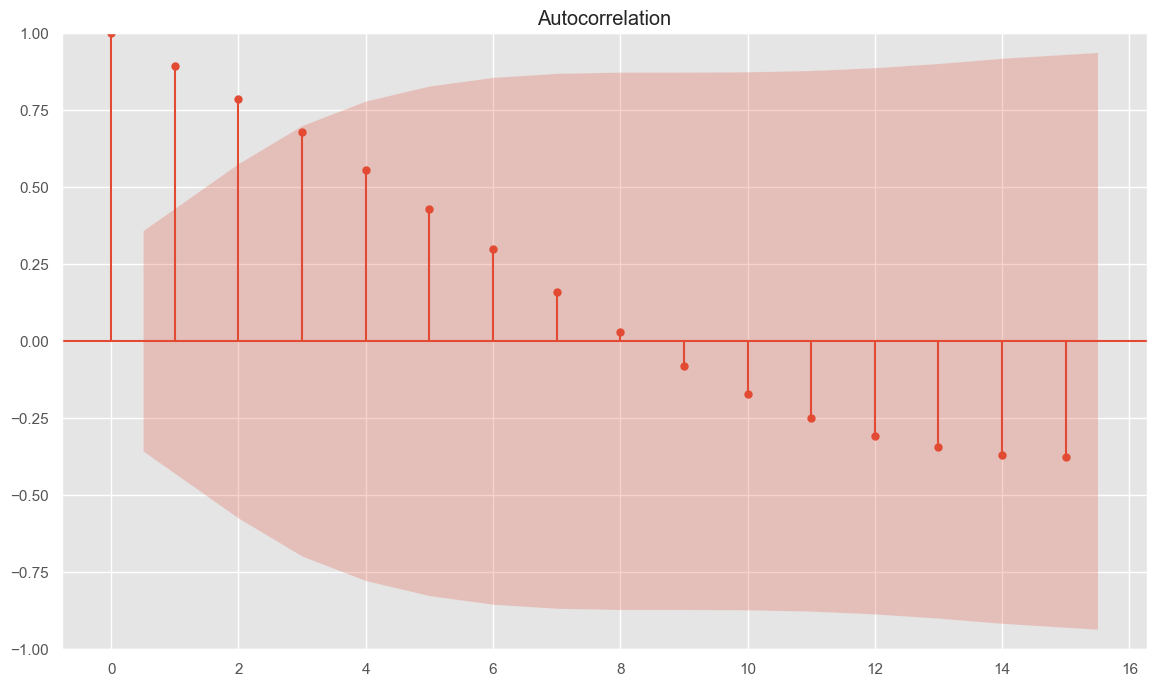

In [12]:
random_walk_acf = acf(Estimated_stock_price, nlags = num_days)
acf_plot = plot_acf(random_walk_acf)
random_walk_acf, Estimated_stock_price

**Looking at the corelation plot we can say that the process is not stationary.** We will try something different method.

### Moving Average (MA Models)

A moving average is a commonly used technique in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles in the data. It calculates the average of a specified number of consecutive data points (or "window") and replaces the original value with this average. This helps in reducing noise and making patterns more visible.

In MA models, we start wit hthe averae muu, to get the value at time t, we add a linear combination of residuals from previous time stamps. In finance, residual refers to new unpredictable information that can't be captured by past data points. The residuals are difference between model's past prediction and actual vales. l

There are mainly two type of Moving Average Models, SMA and EMA. 

##### Simple Moving Average
$$  X_{t} = E[X_{t-1} + X_{t-2} + X_{t-2} + ... + X_{t-p}] $$

Where:
1. $X_t$ is the value of the time series at time t(the value to estimat). )
2. $X_{t-1}, X_{t-2}, ..., X_{t-p}$ are the lagged values of the time series.

##### Exponential Moving Average
$$  EMA_{t} = \alpha X_{t} + (1 - \alpha) EMA_{t -1} $$

.

### Autoregrssion

An autoregression (AR) model is a type of time series model that predicts future values in a time series based on past values. It is a linear model that uses the dependent relationship between an observation and a number of lagged observations (i.e., its own past values).

The general form of an autoregressive model of order $p$, denoted as $AR(p)$, is:

$$ X_{t} = C + \phi_{1} X_{t-1} + \phi_{2} X_{t-2} + \phi_{2} X_{t-2} + ... + \phi_{p} X_{t-p} + \epsilon_{t} $$

Where:
1. $X_t$ is the value of the time series at time t(the value to estimate)
2. $ C $ is a constant value(intercept term for a linear function)
3. $\phi{1}, \phi_{2}, ..., \phi_{p}$ are the parameters of the model that represent the relationship between the current value of the series and its past values. These are known as the autoregressive parameters.
4. $X_{t-1}, X_{t-2}, ..., X_{t-p}$ are the lagged values of the time series.
5. $\epsilon$ 
  is  white noise ee error term at time t, which represents random fluctuations in the data that are not accounted for by the mode
The $AR(p)$ model assumes that the current value of the time series is a linear combination of its past values, with the coefficients $\phi{1}, \phi_{2}, ..., \phi_{p}$ 
  determining the strength of the relationship between each lagged value and the current value. The order p specifies how many past values are included in the model.

Autoregressive models are commonly used in time series analysis for forecasting future values based on past observations. They are especially useful for capturing and predicting trends and patterns in the data.